<p style="background-color:romance; color:jaguar; font-size:250%; text-align:center; border-radius:10px 10px; font-family:newtimeroman; line-height: 1.4; text-transform: uppercase;"><strong>PREDICTIVE ANALYSIS WITH ML</strong></p>

<p style="background-color:romance; color:jaguar; font-size:200%; text-align:center; border-radius:10px 10px; font-family:newtimeroman; line-height: 1.4; text-transform: title;"><strong>Predictive Analysis with ML Algorithms on Credit Score Dataset</strong></p>

# About Dataset

**Age :** the age of the person

**Occupation :** the occupation of the person

**Annual_Income :** the annual income of the person

**Monthly_Inhand_Salary:** the amount which the person receives after the tax, and other deductions are carried over

**Num_Bank_Accounts :** the number of bank accounts a person holds

**Num_Credit_Card :** the number of other credit cards held by a person

**Interest_Rate :** the interest rate on credit card

**Num_of_Loan :** the number of loans taken from the bank

**Type_of_Loan:** type of loan that taken from the bank

**Delay_from_due_date :** the average number of days delayed from the payment date

**Num_of_Delayed_Payment :** the average number of payments delayed by a person

**Changed_Credit_Limit :** the percentage change in credit card limit

**Num_Credit_Inquiries :** the number of credit card inquiries

**Credit_Mix :** the types of different credit accounts you have – mortgages, loans, credit cards, etc.

**Outstanding_Debt :** the remaining debt to be paid (in USD)

**Credit_Utilization_Ratio :** the utilization ratio of credit card

**Credit_History_Age :** the age of credit history of the person

**Payment_of_Min_Amount :** whether only the minimum amount was paid by the person

**Total_EMI_per_month :** the monthly EMI payments (in USD)

**Amount_invested_monthly :** the monthly amount invested by the customer (in USD)

**Payment_Behaviour :** the persons behaviour on payment

**Monthly_Balance :** the monthly balance amount of the customer (in USD)

**Credit_Score :** the bracket of credit score (Poor, Standard, Good)

# Importing Related Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100
plt.rcParams["figure.figsize"] = (12,8)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.3f}'.format

/kaggle/input/creditscorefinal/final_train.csv
/kaggle/input/creditscorefinal/final_test.csv


In [2]:
df = pd.read_csv("/kaggle/input/creditscorefinal/final_train.csv")
df.head(3).T

0  \
Age                                                                  23.000   
Occupation                                                        Scientist   
Annual_Income                                                     19114.120   
Monthly_Inhand_Salary                                              1824.843   
Num_Bank_Accounts                                                     3.000   
Num_Credit_Card                                                       4.000   
Interest_Rate                                                         3.000   
Num_of_Loan                                                           4.000   
Type_of_Loan              Auto Loan, Credit-Builder Loan, Personal Loan,...   
Delay_from_due_date                                                       3   
Num_of_Delayed_Payment                                                    7   
Changed_Credit_Limit                                                 11.270   
Num_Credit_Inquiries                                                  4.000   
Credit_Mix                                                             Good   
Outstanding_Debt                                                    809.980   
Credit_Utilization_Ratio                                             26.823   
Credit_History_Age                                                   22.083   
Payment_of_Min_Amount                                                    No   
Total_EMI_per_month                                                  49.575   
Amount_invested_monthly                                              80.415   
Payment_Behaviour                           High_spent_Small_value_payments   
Monthly_Balance                                                     312.494   
Credit_Score                                                           Good   

                                                                          1  \
Age                                                                  23.000   
Occupation                                                        Scientist   
Annual_Income                                                     19114.120   
Monthly_Inhand_Salary                                              1824.843   
Num_Bank_Accounts                                                     3.000   
Num_Credit_Card                                                       4.000   
Interest_Rate                                                         3.000   
Num_of_Loan                                                           4.000   
Type_of_Loan              Auto Loan, Credit-Builder Loan, Personal Loan,...   
Delay_from_due_date                                                       0   
Num_of_Delayed_Payment                                                    6   
Changed_Credit_Limit                                                 11.270   
Num_Credit_Inquiries                                                  4.000   
Credit_Mix                                                             Good   
Outstanding_Debt                                                    809.980   
Credit_Utilization_Ratio                                             31.945   
Credit_History_Age                                                   22.167   
Payment_of_Min_Amount                                                    No   
Total_EMI_per_month                                                  49.575   
Amount_invested_monthly                                             118.280   
Payment_Behaviour                            Low_spent_Large_value_payments   
Monthly_Balance                                                     284.629   
Credit_Score                                                           Good   

                                                                          2  
Age                                                                  23.000  
Occupation                                                        Scientist  
Annual_Income                                 

In [3]:
df_test = pd.read_csv("/kaggle/input/creditscorefinal/final_test.csv")
df_test.head(3).T

0  \
Age                                                                  23.000   
Occupation                                                        Scientist   
Annual_Income                                                     19114.120   
Monthly_Inhand_Salary                                              1824.843   
Num_Bank_Accounts                                                     3.000   
Num_Credit_Card                                                       4.000   
Interest_Rate                                                         3.000   
Num_of_Loan                                                           4.000   
Type_of_Loan              Auto Loan, Credit-Builder Loan, Personal Loan,...   
Delay_from_due_date                                                       3   
Num_of_Delayed_Payment                                                    7   
Changed_Credit_Limit                                                 11.270   
Num_Credit_Inquiries                                                  4.000   
Credit_Mix                                                             Good   
Outstanding_Debt                                                    809.980   
Credit_Utilization_Ratio                                             35.030   
Credit_History_Age                                                   22.750   
Payment_of_Min_Amount                                                    No   
Total_EMI_per_month                                                  49.575   
Amount_invested_monthly                                             236.643   
Payment_Behaviour                            Low_spent_Small_value_payments   
Monthly_Balance                                                     186.267   

                                                                          1  \
Age                                                                  24.000   
Occupation                                                        Scientist   
Annual_Income                                                     19114.120   
Monthly_Inhand_Salary                                              1824.843   
Num_Bank_Accounts                                                     3.000   
Num_Credit_Card                                                       4.000   
Interest_Rate                                                         3.000   
Num_of_Loan                                                           4.000   
Type_of_Loan              Auto Loan, Credit-Builder Loan, Personal Loan,...   
Delay_from_due_date                                                       3   
Num_of_Delayed_Payment                                                    9   
Changed_Credit_Limit                                                 13.270   
Num_Credit_Inquiries                                                  4.000   
Credit_Mix                                                             Good   
Outstanding_Debt                                                    809.980   
Credit_Utilization_Ratio                                             33.053   
Credit_History_Age                                                   22.833   
Payment_of_Min_Amount                                                    No   
Total_EMI_per_month                                                  49.575   
Amount_invested_monthly                                              21.465   
Payment_Behaviour                          High_spent_Medium_value_payments   
Monthly_Balance                                                     361.444   

                                                                          2  
Age                                                                  24.000  
Occupation                                                        Scientist  
Annual_Income                                                     19114.120  
Monthly_Inhand_Salary                                              1824.843  
Num_Bank_Accounts                               

In [4]:
df.drop(columns=["Type_of_Loan"], inplace=True)
df_test.drop(columns=["Type_of_Loan"], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87241 entries, 0 to 87240
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       87241 non-null  float64
 1   Occupation                87241 non-null  object 
 2   Annual_Income             87241 non-null  float64
 3   Monthly_Inhand_Salary     87241 non-null  float64
 4   Num_Bank_Accounts         87241 non-null  float64
 5   Num_Credit_Card           87241 non-null  float64
 6   Interest_Rate             87241 non-null  float64
 7   Num_of_Loan               87241 non-null  float64
 8   Delay_from_due_date       87241 non-null  int64  
 9   Num_of_Delayed_Payment    87241 non-null  int64  
 10  Changed_Credit_Limit      87241 non-null  float64
 11  Num_Credit_Inquiries      87241 non-null  float64
 12  Credit_Mix                87241 non-null  object 
 13  Outstanding_Debt          87241 non-null  float64
 14  Credit

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42934 entries, 0 to 42933
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       42934 non-null  float64
 1   Occupation                42934 non-null  object 
 2   Annual_Income             42934 non-null  float64
 3   Monthly_Inhand_Salary     42934 non-null  float64
 4   Num_Bank_Accounts         42934 non-null  float64
 5   Num_Credit_Card           42934 non-null  float64
 6   Interest_Rate             42934 non-null  float64
 7   Num_of_Loan               42934 non-null  float64
 8   Delay_from_due_date       42934 non-null  int64  
 9   Num_of_Delayed_Payment    42934 non-null  int64  
 10  Changed_Credit_Limit      42934 non-null  float64
 11  Num_Credit_Inquiries      42934 non-null  float64
 12  Credit_Mix                42934 non-null  object 
 13  Outstanding_Debt          42934 non-null  float64
 14  Credit

In [7]:
df.Credit_Score.value_counts()

Standard    46841
Poor        25990
Good        14410
Name: Credit_Score, dtype: int64

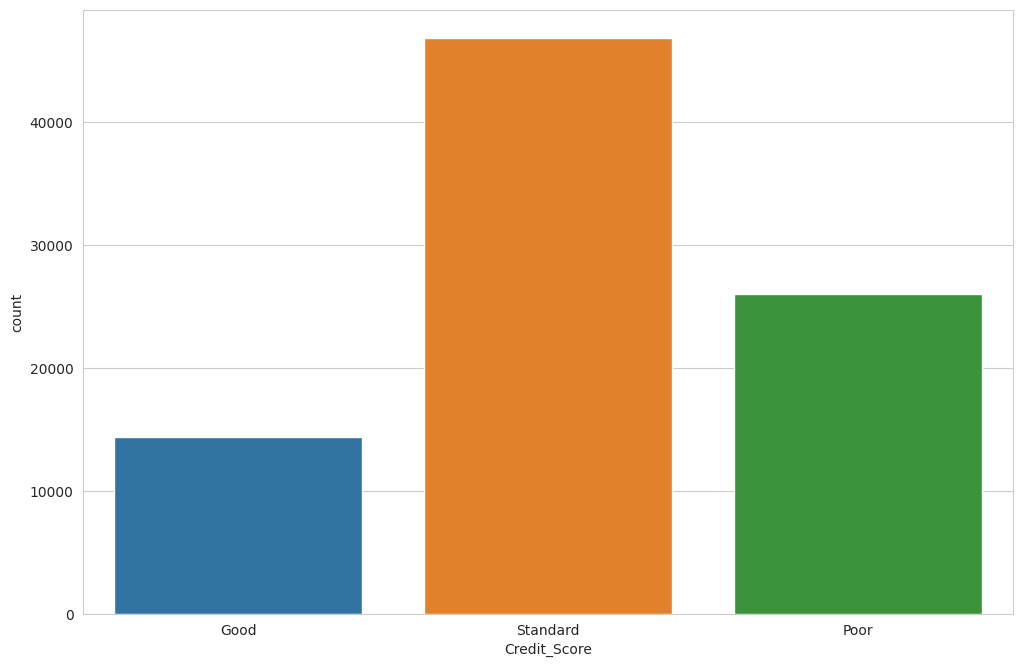

In [8]:
sns.countplot(df["Credit_Score"])
plt.show()

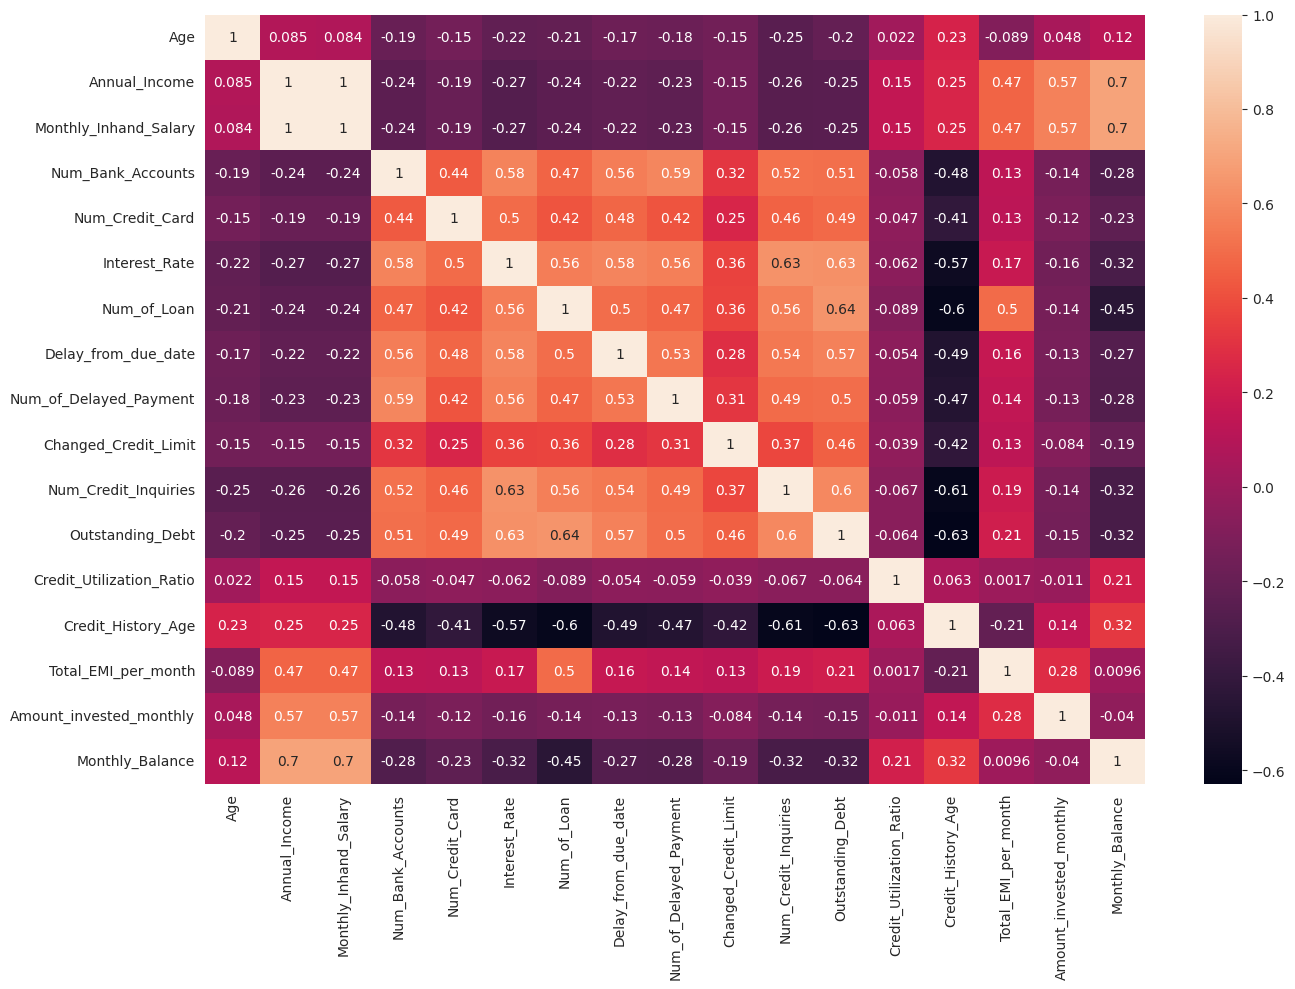

In [9]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True)
plt.tight_layout()

# Implement Machine Learning Algorithms

In [10]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
def classification_validation(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
#     plot_confusion_matrix(model, X_test, y_test);
    print("\n"*3, "-*"*30)
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
#     plot_confusion_matrix(model, X_train, y_train)
#     plt.show()

In [11]:
X = df.drop(columns=["Credit_Score"])
y = df["Credit_Score"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (61068, 21) (61068,)
Test set: (26173, 21) (26173,)


In [12]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

cat = list(X_train.select_dtypes("object").columns)
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

param_grid = [{"logistic__C" : np.linspace(0.1,2,5),
             "logistic__max_iter" : [1000],
              "logistic__n_jobs" : [-1],
             "logistic__penalty" : ['l2'],
            "logistic__solver" : ["lbfgs", "sag", "saga"],
             "logistic__class_weight" : ["balanced"],
              "logistic__multi_class" : ["multinomial"]},
              {
            "logistic__C" : np.linspace(0.1,2,5),
            "logistic__max_iter" : [1000],
            "logistic__n_jobs" : [-1],
            "logistic__penalty" : ['l1'],
            "logistic__solver" : ["saga"],
            "logistic__class_weight" : ["balanced"],
            "logistic__multi_class" : ["multinomial"]}]

operations = [("Column_Transformation", column_trans),("logistic",LogisticRegression(random_state=42))]
pipe_logistic = Pipeline(operations)

grid_logistic = GridSearchCV(pipe_logistic, param_grid = param_grid, cv=5, verbose=0, scoring="f1_weighted")
grid_logistic.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Column_Transformation',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Occupation',
                                                                          'Credit_Mix',
                                                                          'Payment_of_Min_Amount',
                                                                          'Payment_Behaviour'])])),
                                       ('logistic',
                                        LogisticRegression(random_state=42))]),
             param_gr

In [14]:
print("Best parameters of logistic regression are : ",grid_logistic.best_params_)
print("Best score for logistic regression grid search is : ",grid_logistic.best_score_)
classification_validation(grid_logistic, X_train, y_train, X_test, y_test)

Best parameters of logistic regression are :  {'logistic__C': 0.1, 'logistic__class_weight': 'balanced', 'logistic__max_iter': 1000, 'logistic__multi_class': 'multinomial', 'logistic__n_jobs': -1, 'logistic__penalty': 'l1', 'logistic__solver': 'saga'}
Best score for logistic regression grid search is :  0.6740464958626627
Test_Set
[[3598  116  609]
 [1150 5390 1257]
 [2528 2741 8784]]
              precision    recall  f1-score   support

        Good       0.49      0.83      0.62      4323
        Poor       0.65      0.69      0.67      7797
    Standard       0.82      0.63      0.71     14053

    accuracy                           0.68     26173
   macro avg       0.66      0.72      0.67     26173
weighted avg       0.72      0.68      0.68     26173




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train_Set
[[ 8411   232  1444]
 [ 2724 12474  2995]
 [ 6028  6772 19988]]
              precision    recall  f1-score   support

        Good       0.49      0.83    

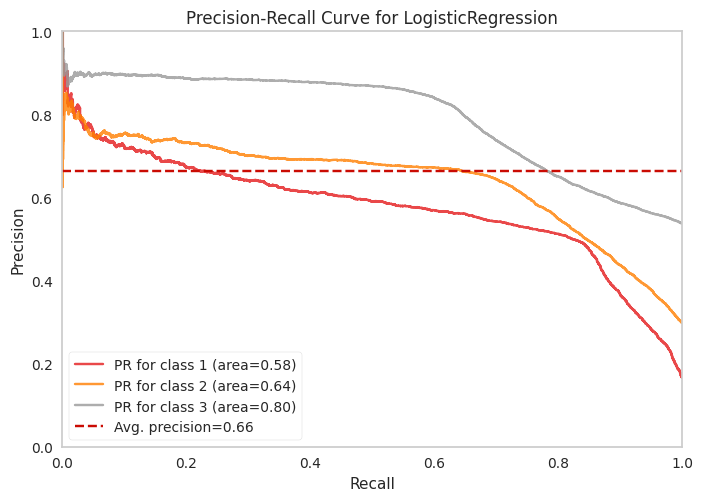

In [15]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("Column_Transformation", column_trans),
              ("logistic",LogisticRegression(C=0.1, class_weight="balanced", 
                                             max_iter=1000, multi_class="multinomial",n_jobs=-1, penalty="l1", 
                                             solver="saga", random_state=42))]
pipe_logistic = Pipeline(operations)

viz = PrecisionRecallCurve(pipe_logistic,  per_class=True, classes= [1,2,3] ,cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

## KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = { "knn__p" : [2],
              "knn__n_neighbors" : np.arange(8,20,2),
              "knn__weights" : ['uniform', 'distance'],
                "knn__n_jobs": [-1]}

pipe_knn = Pipeline(steps = [("Column_Transformation", column_trans),("knn",KNeighborsClassifier())])
pipe_grid = GridSearchCV(pipe_knn, param_grid, cv=5, verbose=2, scoring="f1_weighted")
pipe_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END knn__n_jobs=-1, knn__n_neighbors=8, knn__p=2, knn__weights=uniform; total time=  16.0s
[CV] END knn__n_jobs=-1, knn__n_neighbors=8, knn__p=2, knn__weights=uniform; total time=  16.8s
[CV] END knn__n_jobs=-1, knn__n_neighbors=8, knn__p=2, knn__weights=uniform; total time=  16.5s
[CV] END knn__n_jobs=-1, knn__n_neighbors=8, knn__p=2, knn__weights=uniform; total time=  16.5s
[CV] END knn__n_jobs=-1, knn__n_neighbors=8, knn__p=2, knn__weights=uniform; total time=  16.6s
[CV] END knn__n_jobs=-1, knn__n_neighbors=8, knn__p=2, knn__weights=distance; total time=  16.5s
[CV] END knn__n_jobs=-1, knn__n_neighbors=8, knn__p=2, knn__weights=distance; total time=  16.4s
[CV] END knn__n_jobs=-1, knn__n_neighbors=8, knn__p=2, knn__weights=distance; total time=  16.5s
[CV] END knn__n_jobs=-1, knn__n_neighbors=8, knn__p=2, knn__weights=distance; total time=  16.9s
[CV] END knn__n_jobs=-1, knn__n_neighbors=8, knn__p=2, knn__weights=dis

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Column_Transformation',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Occupation',
                                                                          'Credit_Mix',
                                                                          'Payment_of_Min_Amount',
                                                                          'Payment_Behaviour'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_jobs': [-1],
                         'knn__n_

In [17]:
print("Best parameters for KNN are : ",pipe_grid.best_params_)
print("Best score for KNN are : ",pipe_grid.best_score_)
classification_validation(pipe_grid, X_train, y_train, X_test, y_test)

Best parameters for KNN are :  {'knn__n_jobs': -1, 'knn__n_neighbors': 8, 'knn__p': 2, 'knn__weights': 'distance'}
Best score for KNN are :  0.6928784468187674
Test_Set
[[ 2606   212  1505]
 [  499  4895  2403]
 [ 1317  1815 10921]]
              precision    recall  f1-score   support

        Good       0.59      0.60      0.60      4323
        Poor       0.71      0.63      0.67      7797
    Standard       0.74      0.78      0.76     14053

    accuracy                           0.70     26173
   macro avg       0.68      0.67      0.67     26173
weighted avg       0.70      0.70      0.70     26173




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train_Set
[[10087     0     0]
 [    0 18193     0]
 [    0     0 32788]]
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00     10087
        Poor       1.00      1.00      1.00     18193
    Standard       1.00      1.00      1.00     32788

    accuracy                 

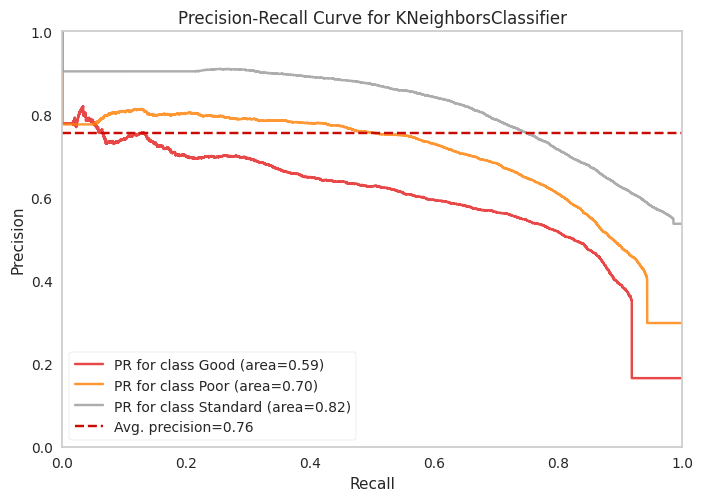

In [18]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("Column_Transformation", column_trans),
              ("knn",KNeighborsClassifier(n_neighbors = 8, weights="distance", p=2, n_jobs=-1))]
pipe_knn = Pipeline(operations)

viz = PrecisionRecallCurve(pipe_knn,  per_class=True, classes= ["Good","Poor","Standard"] ,cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

## SVM

In [19]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

pipe_svc = Pipeline(steps=[("column_encode", column_trans), ("SVC", SVC(random_state=42))])
pipe_svc.fit(X_train, y_train)

Pipeline(steps=[('column_encode',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Occupation', 'Credit_Mix',
                                                   'Payment_of_Min_Amount',
                                                   'Payment_Behaviour'])])),
                ('SVC', SVC(random_state=42))])

In [20]:
classification_validation(pipe_svc, X_train, y_train, X_test, y_test)

Test_Set
[[ 3062    53  1208]
 [  681  4837  2279]
 [ 1735  1561 10757]]
              precision    recall  f1-score   support

        Good       0.56      0.71      0.62      4323
        Poor       0.75      0.62      0.68      7797
    Standard       0.76      0.77      0.76     14053

    accuracy                           0.71     26173
   macro avg       0.69      0.70      0.69     26173
weighted avg       0.72      0.71      0.71     26173




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train_Set
[[ 7279   114  2694]
 [ 1536 11654  5003]
 [ 3890  3629 25269]]
              precision    recall  f1-score   support

        Good       0.57      0.72      0.64     10087
        Poor       0.76      0.64      0.69     18193
    Standard       0.77      0.77      0.77     32788

    accuracy                           0.72     61068
   macro avg       0.70      0.71      0.70     61068
weighted avg       0.73      0.72      0.72     61068



## DecisionTree

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

cat = list(X_train.select_dtypes("object").columns)
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

pipe_dt = Pipeline(steps=[("column_encode", column_trans), ("decisiontree", DecisionTreeClassifier(random_state=42))])

params = {"decisiontree__criterion" : ["gini", "entropy"],
          "decisiontree__max_features":["auto", "log2"],
        "decisiontree__max_depth": [3, 4, 5],
        "decisiontree__min_samples_leaf": [2, 3, 4],
        "decisiontree__min_samples_split": [ 3, 5, 7]}

grid_dt = GridSearchCV(pipe_dt, param_grid=params, cv=5, verbose=2, scoring="f1_weighted")
grid_dt.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END decisiontree__criterion=gini, decisiontree__max_depth=3, decisiontree__max_features=auto, decisiontree__min_samples_leaf=2, decisiontree__min_samples_split=3; total time=   0.2s
[CV] END decisiontree__criterion=gini, decisiontree__max_depth=3, decisiontree__max_features=auto, decisiontree__min_samples_leaf=2, decisiontree__min_samples_split=3; total time=   0.2s
[CV] END decisiontree__criterion=gini, decisiontree__max_depth=3, decisiontree__max_features=auto, decisiontree__min_samples_leaf=2, decisiontree__min_samples_split=3; total time=   0.2s
[CV] END decisiontree__criterion=gini, decisiontree__max_depth=3, decisiontree__max_features=auto, decisiontree__min_samples_leaf=2, decisiontree__min_samples_split=3; total time=   0.2s
[CV] END decisiontree__criterion=gini, decisiontree__max_depth=3, decisiontree__max_features=auto, decisiontree__min_samples_leaf=2, decisiontree__min_samples_split=3; total time=   0.2s
[C

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_encode',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Occupation',
                                                                          'Credit_Mix',
                                                                          'Payment_of_Min_Amount',
                                                                          'Payment_Behaviour'])])),
                                       ('decisiontree',
                                        DecisionTreeClassifier(random_state=42))]),
    

In [22]:
print("Best parameters for dt are : ",grid_dt.best_params_)
print("Best score for dt are : ",grid_dt.best_score_)
classification_validation(grid_dt, X_train, y_train, X_test, y_test)

Best parameters for dt are :  {'decisiontree__criterion': 'gini', 'decisiontree__max_depth': 5, 'decisiontree__max_features': 'auto', 'decisiontree__min_samples_leaf': 3, 'decisiontree__min_samples_split': 3}
Best score for dt are :  0.6134243813251434
Test_Set
[[  502    24  3797]
 [   13  4116  3668]
 [  163  1380 12510]]
              precision    recall  f1-score   support

        Good       0.74      0.12      0.20      4323
        Poor       0.75      0.53      0.62      7797
    Standard       0.63      0.89      0.74     14053

    accuracy                           0.65     26173
   macro avg       0.70      0.51      0.52     26173
weighted avg       0.68      0.65      0.61     26173




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train_Set
[[ 1270    72  8745]
 [   30  9695  8468]
 [  358  3351 29079]]
              precision    recall  f1-score   support

        Good       0.77      0.13      0.22     10087
        Poor       0.74      0.53      0.62  

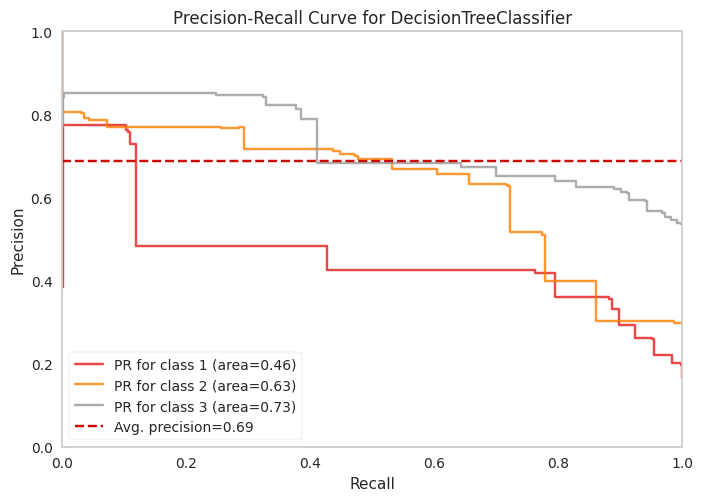

In [23]:
from yellowbrick.classifier import PrecisionRecallCurve

cat = list(X_train.select_dtypes("object").columns)
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

pipe_dt = Pipeline(steps=[("column_encode", column_trans), ("decisiontree", DecisionTreeClassifier(random_state=42, max_depth=5, max_features="auto",
                                                                                                      min_samples_split=3, min_samples_leaf=3))])

viz = PrecisionRecallCurve(pipe_dt,  per_class=True, classes= [1,2,3] ,cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

## RandomForest

In [24]:
from sklearn.ensemble import RandomForestClassifier


operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier())]

pipe_rf = Pipeline(steps=operations_rf)

param_grid = {'RF_model__n_estimators':[200,400],
             'RF_model__max_features':[20,30, "sqrt"],
             'RF_model__max_depth':[3, 4, 5],
              "RF_model__class_weight" : ["balanced"] ,
             'RF_model__max_samples':[0.5 ,1]} 
rf_grid_model = GridSearchCV(estimator=pipe_rf,param_grid=param_grid, cv=5, verbose=2, scoring="f1_weighted", n_jobs=-1)
rf_grid_model.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END RF_model__class_weight=balanced, RF_model__max_depth=3, RF_model__max_features=20, RF_model__max_samples=0.5, RF_model__n_estimators=200; total time=  25.5s
[CV] END RF_model__class_weight=balanced, RF_model__max_depth=3, RF_model__max_features=20, RF_model__max_samples=0.5, RF_model__n_estimators=200; total time=  26.1s
[CV] END RF_model__class_weight=balanced, RF_model__max_depth=3, RF_model__max_features=20, RF_model__max_samples=0.5, RF_model__n_estimators=200; total time=  25.6s
[CV] END RF_model__class_weight=balanced, RF_model__max_depth=3, RF_model__max_features=20, RF_model__max_samples=0.5, RF_model__n_estimators=400; total time=  51.5s
[CV] END RF_model__class_weight=balanced, RF_model__max_depth=3, RF_model__max_features=20, RF_model__max_samples=0.5, RF_model__n_estimators=400; total time=  49.8s
[CV] END RF_model__class_weight=balanced, RF_model__max_depth=3, RF_model__max_features=20, RF_model__max_sa

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Occupation',
                                                                          'Credit_Mix',
                                                                          'Payment_of_Min_Amount',
                                                                          'Payment_Behaviour'])])),
                                       ('RF_model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'RF_model__cl

In [25]:
print("Best parameters for Random Forest are : ",rf_grid_model.best_params_)
print("Best score for Random Forest are : ",rf_grid_model.best_score_)
classification_validation(rf_grid_model, X_train, y_train, X_test, y_test)

Best parameters for Random Forest are :  {'RF_model__class_weight': 'balanced', 'RF_model__max_depth': 5, 'RF_model__max_features': 20, 'RF_model__max_samples': 0.5, 'RF_model__n_estimators': 400}
Best score for Random Forest are :  0.6900240326621272
Test_Set
[[3515  209  599]
 [ 845 6213  739]
 [2400 3233 8420]]
              precision    recall  f1-score   support

        Good       0.52      0.81      0.63      4323
        Poor       0.64      0.80      0.71      7797
    Standard       0.86      0.60      0.71     14053

    accuracy                           0.69     26173
   macro avg       0.68      0.74      0.68     26173
weighted avg       0.74      0.69      0.70     26173




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train_Set
[[ 8215   454  1418]
 [ 1947 14588  1658]
 [ 5754  7795 19239]]
              precision    recall  f1-score   support

        Good       0.52      0.81      0.63     10087
        Poor       0.64      0.80      0.71     18193
 

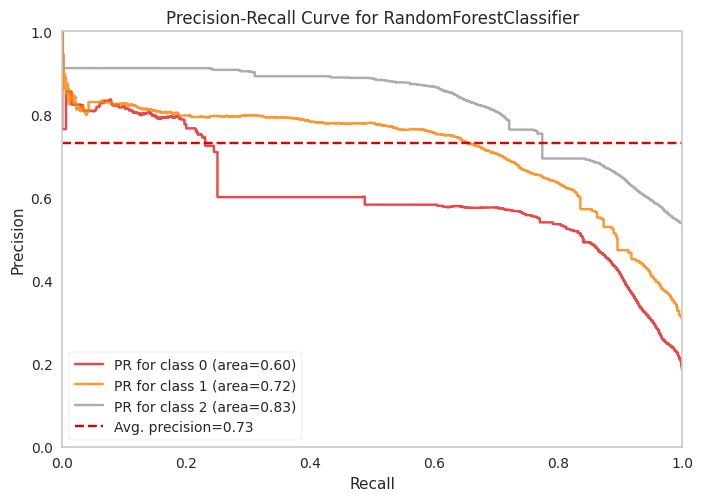

In [26]:
from yellowbrick.classifier import PrecisionRecallCurve

operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight= 'balanced', 
                            max_depth= 5, max_features = 20, max_samples = 0.5, n_estimators=200))]

pipe_rf = Pipeline(steps=operations_rf)

viz = PrecisionRecallCurve(pipe_rf,  per_class=True, cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

## XGBoost

In [27]:
from xgboost import XGBClassifier

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder="passthrough")
operations = [("encoder", column_trans), ("XGB", XGBClassifier(n_jobs=-1))]
y_train2 = y_train.replace({"Good":0,"Poor":1,"Standard":2})
pipe_xgb = Pipeline(steps=operations)

param_grid = {"XGB__n_estimators":[50, 150],
              'XGB__max_depth':[2,4],
              "XGB__learning_rate": [0.1, 0.3],
              "XGB__subsample":[0.7, 1]}

xgb_grid_model = GridSearchCV(pipe_xgb, param_grid, cv=5, verbose=2, scoring="f1_weighted", n_jobs=-1).fit(X_train, y_train2)


Fitting 5 folds for each of 16 candidates, totalling 80 fits

[CV] END RF_model__class_weight=balanced, RF_model__max_depth=5, RF_model__max_features=sqrt, RF_model__max_samples=1, RF_model__n_estimators=400; total time=   3.6s
[CV] END RF_model__class_weight=balanced, RF_model__max_depth=5, RF_model__max_features=sqrt, RF_model__max_samples=1, RF_model__n_estimators=400; total time=   3.2s
[CV] END XGB__learning_rate=0.1, XGB__max_depth=2, XGB__n_estimators=50, XGB__subsample=0.7; total time=  15.0s
[CV] END XGB__learning_rate=0.1, XGB__max_depth=2, XGB__n_estimators=50, XGB__subsample=0.7; total time=  13.5s
[CV] END XGB__learning_rate=0.1, XGB__max_depth=2, XGB__n_estimators=50, XGB__subsample=1; total time=  11.6s
[CV] END XGB__learning_rate=0.1, XGB__max_depth=2, XGB__n_estimators=50, XGB__subsample=1; total time=  11.4s
[CV] END XGB__learning_rate=0.1, XGB__max_depth=2, XGB__n_estimators=50, XGB__subsample=1; total time=  12.0s
[CV] END XGB__learning_rate=0.1, XGB__max_depth=2, X

In [28]:
y_test2 = y_test.replace({"Good":0,"Poor":1,"Standard":2})
print("Best parameters for XG boosting are : ",xgb_grid_model.best_params_)
print("Best score for XG boosting are : ",xgb_grid_model.best_score_)
classification_validation(xgb_grid_model, X_train, y_train2, X_test, y_test2)

Best parameters for XG boosting are :  {'XGB__learning_rate': 0.3, 'XGB__max_depth': 4, 'XGB__n_estimators': 150, 'XGB__subsample': 1}
Best score for XG boosting are :  0.7494201902303615
Test_Set
[[ 3006    84  1233]
 [  319  5478  2000]
 [ 1249  1663 11141]]
              precision    recall  f1-score   support

           0       0.66      0.70      0.68      4323
           1       0.76      0.70      0.73      7797
           2       0.78      0.79      0.78     14053

    accuracy                           0.75     26173
   macro avg       0.73      0.73      0.73     26173
weighted avg       0.75      0.75      0.75     26173




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train_Set
[[ 7613   137  2337]
 [  631 13519  4043]
 [ 2436  3638 26714]]
              precision    recall  f1-score   support

           0       0.71      0.75      0.73     10087
           1       0.78      0.74      0.76     18193
           2       0.81      0.81      0.81     32788

 

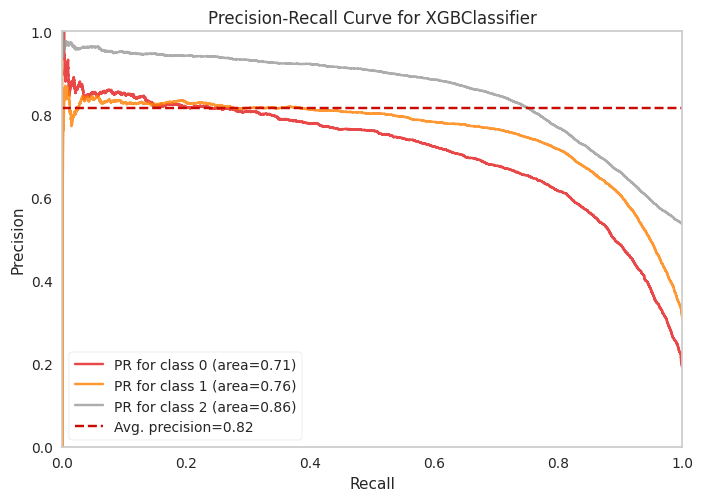

In [29]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("encoder", column_trans), ("XGB", XGBClassifier(n_jobs=-1, learning_rate=0.3,
                                                max_depth=4, n_estimators=150, subsample=1))]
pipe_xgb = Pipeline(steps=operations)

viz = PrecisionRecallCurve(pipe_xgb,  per_class=True, cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

## LightGBM

In [30]:
import lightgbm as lgb

operations = [("encoder", column_trans), ("lgmboost", lgb.LGBMClassifier())]
pipe_lgbm = Pipeline(steps=operations)
parameters = {
        'lgmboost__num_leaves': [50, 100],
        'lgmboost__max_depth': [4, 5], 
        'lgmboost__learning_rate': [0.1, 0.3],
        "lgmboost__boosting_type" : ["gbdt","rf"] }

lgmboost_cv = GridSearchCV(pipe_lgbm, parameters, cv = 5, n_jobs = -1, verbose = 2, scoring="f1_weighted") #CV normally min 5 is desired
lgmboost_cv.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits

[CV] END XGB__learning_rate=0.3, XGB__max_depth=4, XGB__n_estimators=50, XGB__subsample=1; total time=  21.8s
[CV] END XGB__learning_rate=0.3, XGB__max_depth=4, XGB__n_estimators=50, XGB__subsample=1; total time=  22.2s
[CV] END XGB__learning_rate=0.3, XGB__max_depth=4, XGB__n_estimators=50, XGB__subsample=1; total time=  21.9s
[CV] END XGB__learning_rate=0.3, XGB__max_depth=4, XGB__n_estimators=150, XGB__subsample=0.7; total time= 1.1min
[CV] END XGB__learning_rate=0.3, XGB__max_depth=4, XGB__n_estimators=150, XGB__subsample=0.7; total time= 1.1min
[CV] END XGB__learning_rate=0.3, XGB__max_depth=4, XGB__n_estimators=150, XGB__subsample=0.7; total time= 1.1min
[CV] END XGB__learning_rate=0.3, XGB__max_depth=4, XGB__n_estimators=150, XGB__subsample=1; total time= 1.1min
[CV] END XGB__learning_rate=0.3, XGB__max_depth=4, XGB__n_estimators=150, XGB__subsample=1; total time= 1.0min
[CV] END lgmboost__boosting_type=gbdt, lgmboost

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /usr/local/src/LightGBM/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /usr/local/src/LightGBM/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /usr/local/src/LightGBM/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /usr/local/src/LightGBM/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /usr/local/src/LightGBM/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && conf

[CV] END XGB__learning_rate=0.1, XGB__max_depth=2, XGB__n_estimators=150, XGB__subsample=1; total time=  36.1s
[CV] END XGB__learning_rate=0.1, XGB__max_depth=2, XGB__n_estimators=150, XGB__subsample=1; total time=  34.0s
[CV] END XGB__learning_rate=0.1, XGB__max_depth=2, XGB__n_estimators=150, XGB__subsample=1; total time=  35.0s
[CV] END XGB__learning_rate=0.1, XGB__max_depth=4, XGB__n_estimators=50, XGB__subsample=0.7; total time=  23.0s
[CV] END XGB__learning_rate=0.1, XGB__max_depth=4, XGB__n_estimators=50, XGB__subsample=0.7; total time=  23.8s
[CV] END XGB__learning_rate=0.1, XGB__max_depth=4, XGB__n_estimators=50, XGB__subsample=1; total time=  23.1s
[CV] END XGB__learning_rate=0.1, XGB__max_depth=4, XGB__n_estimators=50, XGB__subsample=1; total time=  21.6s
[CV] END XGB__learning_rate=0.1, XGB__max_depth=4, XGB__n_estimators=50, XGB__subsample=1; total time=  22.6s
[CV] END XGB__learning_rate=0.1, XGB__max_depth=4, XGB__n_estimators=150, XGB__subsample=0.7; total time= 1.2min


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /usr/local/src/LightGBM/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /usr/local/src/LightGBM/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /usr/local/src/LightGBM/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /usr/local/src/LightGBM/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /usr/local/src/LightGBM/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && conf

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Occupation',
                                                                          'Credit_Mix',
                                                                          'Payment_of_Min_Amount',
                                                                          'Payment_Behaviour'])])),
                                       ('lgmboost', LGBMClassifier())]),
             n_jobs=-1,
             param_grid={'lgmboost__boosting_type': ['gbdt', 'rf'],
   

In [31]:
print("Best parameters for LGBM are : ",lgmboost_cv.best_params_)
print("Best score for LGBM are : ",lgmboost_cv.best_score_)
classification_validation(lgmboost_cv, X_train, y_train, X_test, y_test)

Best parameters for LGBM are :  {'lgmboost__boosting_type': 'gbdt', 'lgmboost__learning_rate': 0.3, 'lgmboost__max_depth': 5, 'lgmboost__num_leaves': 50}
Best score for LGBM are :  0.7601868671653573
Test_Set
[[ 3065    63  1195]
 [  298  5791  1708]
 [ 1159  1737 11157]]
              precision    recall  f1-score   support

        Good       0.68      0.71      0.69      4323
        Poor       0.76      0.74      0.75      7797
    Standard       0.79      0.79      0.79     14053

    accuracy                           0.76     26173
   macro avg       0.74      0.75      0.75     26173
weighted avg       0.77      0.76      0.76     26173




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train_Set
[[ 7968   113  2006]
 [  444 14616  3133]
 [ 1934  3462 27392]]
              precision    recall  f1-score   support

        Good       0.77      0.79      0.78     10087
        Poor       0.80      0.80      0.80     18193
    Standard       0.84      0.84      0.84 

## CatBoost

In [32]:
from catboost import CatBoostClassifier

operations = [("encoder", column_trans), ("catboost", CatBoostClassifier(bootstrap_type="MVS"))]
pipe_catboost = Pipeline(steps=operations)
parameters = {
        'catboost__depth': [3, 4, 5], 
        'catboost__learning_rate': [0.1, 0.3],
        "catboost__rsm" : [0.5,0.8] }

catboost_cv = GridSearchCV(pipe_catboost, parameters, cv = 5, n_jobs = -1, verbose = 2, scoring="f1_weighted")
catboost_cv.fit(X_train, y_train)
best = catboost_cv.best_params_
print(best)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END lgmboost__boosting_type=gbdt, lgmboost__learning_rate=0.1, lgmboost__max_depth=4, lgmboost__num_leaves=50; total time=   4.3s
[CV] END lgmboost__boosting_type=gbdt, lgmboost__learning_rate=0.1, lgmboost__max_depth=4, lgmboost__num_leaves=100; total time=   5.5s
[CV] END lgmboost__boosting_type=gbdt, lgmboost__learning_rate=0.1, lgmboost__max_depth=4, lgmboost__num_leaves=100; total time=   4.4s
[CV] END lgmboost__boosting_type=gbdt, lgmboost__learning_rate=0.1, lgmboost__max_depth=4, lgmboost__num_leaves=100; total time=   4.5s
[CV] END lgmboost__boosting_type=gbdt, lgmboost__learning_rate=0.1, lgmboost__max_depth=5, lgmboost__num_leaves=50; total time=   4.8s
[CV] END lgmboost__boosting_type=gbdt, lgmboost__learning_rate=0.1, lgmboost__max_depth=5, lgmboost__num_leaves=50; total time=   4.9s
[CV] END lgmboost__boosting_type=gbdt, lgmboost__learning_rate=0.1, lgmboost__max_depth=5, lgmboost__num_leaves=100; total tim

In [38]:
print("Best parameters for Catboost boosting are : ",catboost_cv.best_params_)
print("Best score for Catboost boosting are : ",catboost_cv.best_score_)
classification_validation(catboost_cv, X_train, y_train, X_test, y_test)

Best parameters for Catboost boosting are :  {'catboost__depth': 5, 'catboost__learning_rate': 0.3, 'catboost__rsm': 0.8}
Best score for Catboost boosting are :  0.7758498688082539
Test_Set
[[ 3121    50  1152]
 [  180  6050  1567]
 [  968  1655 11430]]
              precision    recall  f1-score   support

        Good       0.73      0.72      0.73      4323
        Poor       0.78      0.78      0.78      7797
    Standard       0.81      0.81      0.81     14053

    accuracy                           0.79     26173
   macro avg       0.77      0.77      0.77     26173
weighted avg       0.79      0.79      0.79     26173




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train_Set
[[ 8313    54  1720]
 [  194 15885  2114]
 [ 1386  2855 28547]]
              precision    recall  f1-score   support

        Good       0.84      0.82      0.83     10087
        Poor       0.85      0.87      0.86     18193
    Standard       0.88      0.87      0.88     32788

    accu

# Final Model

In [41]:
from catboost import CatBoostClassifier

cat = list(X_train.select_dtypes("object").columns)
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), remainder="passthrough")
operations = [("encoder", column_trans), ("catboost", CatBoostClassifier(bootstrap_type="MVS",depth = 5, learning_rate = 0.3,rsm = 0.8))]

pipe_catboost = Pipeline(steps=operations)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}).fit(X_train, y_train)

classification_validation(pipe_catboost, X_train, y_train, X_test, y_test)

0:	learn: 0.9264346	total: 35.4ms	remaining: 35.4s
1:	learn: 0.8291795	total: 74.9ms	remaining: 37.4s
2:	learn: 0.7724593	total: 111ms	remaining: 37s
3:	learn: 0.7340984	total: 149ms	remaining: 37.2s
4:	learn: 0.7114257	total: 187ms	remaining: 37.3s
5:	learn: 0.6971508	total: 226ms	remaining: 37.4s
6:	learn: 0.6873271	total: 261ms	remaining: 37s
7:	learn: 0.6788265	total: 299ms	remaining: 37.1s
8:	learn: 0.6730120	total: 336ms	remaining: 37s
9:	learn: 0.6688101	total: 374ms	remaining: 37s
10:	learn: 0.6654144	total: 412ms	remaining: 37s
11:	learn: 0.6626346	total: 452ms	remaining: 37.2s
12:	learn: 0.6600469	total: 491ms	remaining: 37.2s
13:	learn: 0.6583646	total: 526ms	remaining: 37.1s
14:	learn: 0.6568490	total: 561ms	remaining: 36.8s
15:	learn: 0.6552121	total: 600ms	remaining: 36.9s
16:	learn: 0.6541567	total: 635ms	remaining: 36.7s
17:	learn: 0.6525209	total: 673ms	remaining: 36.7s
18:	learn: 0.6512738	total: 714ms	remaining: 36.9s
19:	learn: 0.6503040	total: 751ms	remaining: 36.8

<AxesSubplot:>

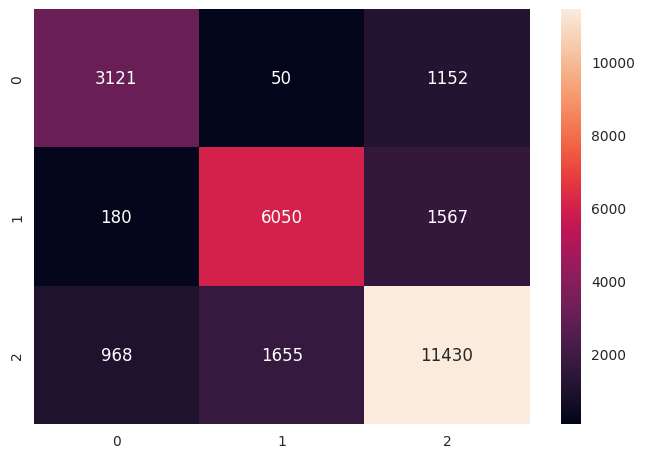

In [50]:
y_pred = pipe_catboost.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')

# Deployment

In [51]:
import pickle

cat = list(X_train.select_dtypes("object").columns)
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), remainder="passthrough")
operations = [("encoder", column_trans), ("catboost", CatBoostClassifier(bootstrap_type="MVS",depth = 5, learning_rate = 0.3,rsm = 0.8))]

final_model = Pipeline(steps=operations)
final_model.fit(X, y)

pickle.dump(pipe_catboost, open("Credit_Score_Model", 'wb'))

0:	learn: 0.9181089	total: 53.6ms	remaining: 53.5s
1:	learn: 0.8222415	total: 107ms	remaining: 53.2s
2:	learn: 0.7678923	total: 158ms	remaining: 52.5s
3:	learn: 0.7356461	total: 239ms	remaining: 59.6s
4:	learn: 0.7118275	total: 291ms	remaining: 58s
5:	learn: 0.6976521	total: 344ms	remaining: 57s
6:	learn: 0.6866281	total: 392ms	remaining: 55.6s
7:	learn: 0.6787118	total: 445ms	remaining: 55.1s
8:	learn: 0.6739988	total: 491ms	remaining: 54.1s
9:	learn: 0.6698246	total: 542ms	remaining: 53.6s
10:	learn: 0.6672886	total: 591ms	remaining: 53.2s
11:	learn: 0.6642119	total: 649ms	remaining: 53.4s
12:	learn: 0.6626067	total: 699ms	remaining: 53.1s
13:	learn: 0.6610069	total: 770ms	remaining: 54.3s
14:	learn: 0.6589153	total: 846ms	remaining: 55.5s
15:	learn: 0.6576071	total: 894ms	remaining: 55s
16:	learn: 0.6566217	total: 942ms	remaining: 54.4s
17:	learn: 0.6553603	total: 995ms	remaining: 54.3s
18:	learn: 0.6535988	total: 1.04s	remaining: 54s
19:	learn: 0.6523873	total: 1.09s	remaining: 53.

In [52]:
model = pickle.load(open("Credit_Score_Model", "rb"))
predictions = model.predict(df_test)

In [53]:
np.array(np.unique(predictions, return_counts=True)).T

array([['Good', 7182],
       ['Poor', 12836],
       ['Standard', 22916]], dtype=object)